In [6]:
import os
import pandas as pd
import re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def extract_gene_name(filename):
    match = re.search(r'_([^_]+)\.csv$', filename)
    return match.group(1) if match else None

def combine_gene_tables(input_folder):
    combined_data = {}

    for file in os.listdir(input_folder):
        if file.endswith('.csv'):
            gene = extract_gene_name(file)
            if gene:
                file_path = os.path.join(input_folder, file)
                df = pd.read_csv(file_path)
                
                # If only one row of data, flatten it
                if df.shape[0] == 1:
                    combined_data[gene] = df.iloc[0].to_dict()
                else:
                    print(f"Warning: File '{file}' contains multiple rows, using first row only.")
                    combined_data[gene] = df.iloc[0].to_dict()

    # Create a DataFrame from the combined dictionary
    combined_df = pd.DataFrame.from_dict(combined_data, orient='index')
    combined_df.index.name = 'Gene'

    return combined_df

# Example usage
input_folder = "Data_tables"  # Replace with your actual folder
result_df = combine_gene_tables(input_folder)

result_df


,cancer,infiltrates,rho,p,adj.p
Gene,,,,,
gene1,ACC (n=79),T cell CD8+ central memory_XCELL,0.288552,0.013296,0.021797
gene2,ACC (n=79),T cell CD8+ central memory_XCELL,0.329757,0.004386,0.006050
gene3,ACC (n=79),T cell CD8+ central memory_XCELL,0.245585,0.036237,0.045297
gene4,ACC (n=79),T cell CD8+ central memory_XCELL,0.009336,0.937514,0.969007
gene5,ACC (n=79),T cell CD8+ central memory_XCELL,-0.002665,0.982150,0.986843


In [7]:
import os
import pandas as pd
import re

def extract_gene_name(filename):
    match = re.search(r'_([^_]+)\.csv$', filename)
    return match.group(1) if match else None

def combine_filtered_rho(input_folder):
    combined_rows = {}

    for file in os.listdir(input_folder):
        if file.endswith('.csv'):
            gene = extract_gene_name(file)
            if gene:
                file_path = os.path.join(input_folder, file)
                df = pd.read_csv(file_path)

                # Filter rows with P <= 0.05
                df_filtered = df[df['p'] <= 0.05]

                # Create dictionary: infiltrates_type -> rho
                rho_dict = pd.Series(df_filtered['rho'].values, index=df_filtered['infiltrates']).to_dict()

                # Store in combined dictionary
                combined_rows[gene] = rho_dict

    # Create final DataFrame
    result_df = pd.DataFrame.from_dict(combined_rows, orient='index')
    result_df.index.name = 'Gene'

    return result_df

# Example usage
input_folder = "Data_tables"  # Replace with your actual path
result_df = combine_filtered_rho(input_folder)

# Save or view result
result_df.to_csv("filtered_rho_by_gene.csv")
result_df


,T cell CD8+ central memory_XCELL,T cell CD8+ effector memory_XCELL,T cell CD8+_CIBERSORT,T cell CD8+_CIBERSORT-ABS,T cell CD8+_MCPCOUNTER,T cell CD8+_XCELL,T cell CD8+_EPIC,T cell CD8+_QUANTISEQ,T cell CD8+ naive_XCELL,T cell CD8+_TIMER
Gene,,,,,,,,,,
gene1,0.543059,0.282230,0.451125,0.623151,0.768555,0.397323,0.453696,0.707433,0.280938,0.210550
gene2,0.587454,0.247564,0.596742,0.675355,0.710664,0.471649,0.413233,0.715537,0.317264,0.278702
gene3,0.646673,0.236036,0.643888,0.781610,0.874132,0.519187,0.291700,0.810148,0.233247,0.299912
gene4,0.137391,-0.227028,-0.175424,0.350488,-0.510882,-0.359929,0.241111,-0.491947,-0.383355,-0.483389
gene5,0.395516,0.256072,0.374904,0.469918,0.533877,0.392752,0.530394,0.543871,0.401177,0.259374


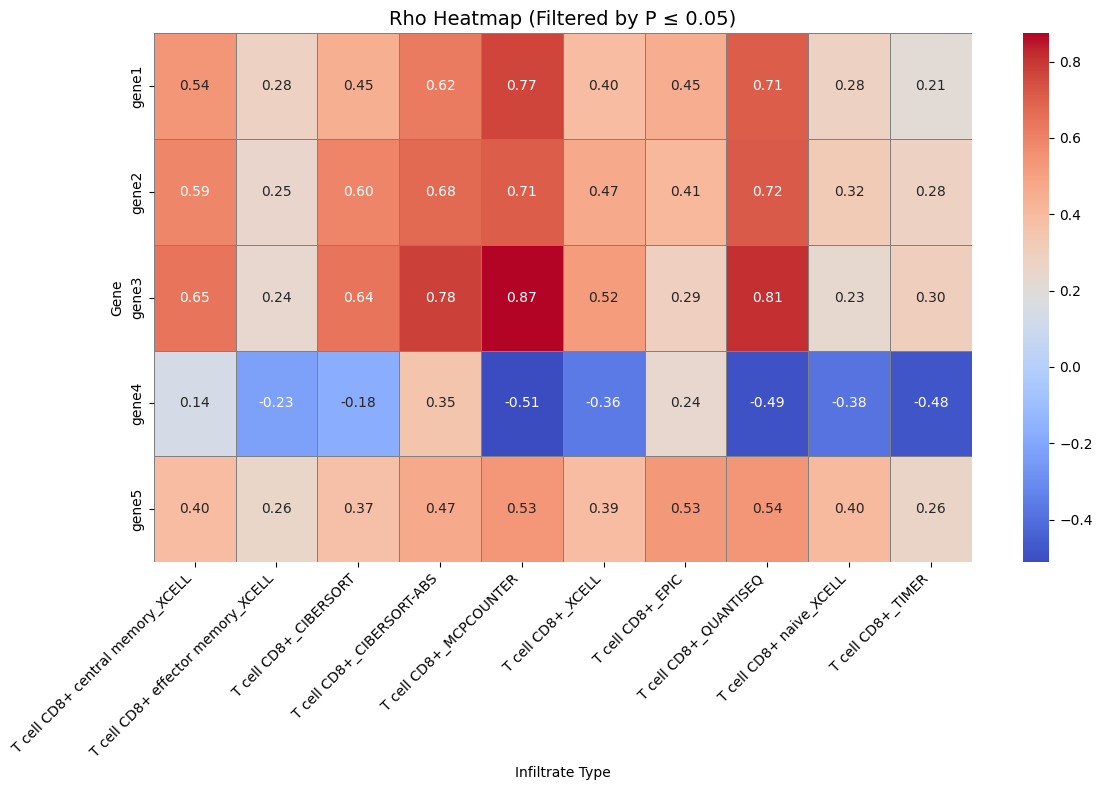

In [8]:
# Load the filtered result table
df = result_df

# Set up the figure size
plt.figure(figsize=(12, 8))

# Create a heatmap with values annotated
heatmap = sns.heatmap(df, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5, linecolor='gray')

# Set title and labels
plt.title("Rho Heatmap (Filtered by P ≤ 0.05)", fontsize=14)
plt.xlabel("Infiltrate Type")
plt.ylabel("Gene")

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()